In [4]:
from pyspark.sql.functions import to_timestamp
from pyspark.sql.functions import month, year
%run data.py

# Permitted Events Data (2020 Original vs. Updated)

### 2020 Originally Planned Evenets
#### NYC Open Data: Permitted Event Information-Original

In [5]:
planned_event = "https://data.cityofnewyork.us/resource/bkfu-528j.csv?$select=event_id,event_name,start_date_time,end_date_time,event_type,event_borough&$where=start_date_time>'2020-01-01T00:00:00.000'&$limit=5000000"
planned = pd.read_csv(planned_event)
planned.count()

event_id           1543598
event_name         1543598
start_date_time    1543598
end_date_time      1543598
event_type         1543598
event_borough      1543598
dtype: int64

In [6]:
planned.head(10)

,event_id,event_name,start_date_time,end_date_time,event_type,event_borough
0,516637,Lawn Maintenance- Veteran's Lawn,2020-01-01T00:01:00.000,2020-01-01T23:59:00.000,Special Event,Manhattan
1,516638,Lawn Maintenance,2020-01-01T00:01:00.000,2020-01-01T23:59:00.000,Special Event,Manhattan
2,516639,Lawn Maintenance- Redbud Lawn,2020-01-01T00:01:00.000,2020-01-01T23:59:00.000,Special Event,Manhattan
3,516641,Lawn Maintenance- Cherry Lawn,2020-01-01T00:01:00.000,2020-01-01T23:59:00.000,Special Event,Manhattan
4,516642,Lawn Maintenance- Farragut Lawn,2020-01-01T00:01:00.000,2020-01-01T23:59:00.000,Special Event,Manhattan
5,516643,Lawn Maintenance- Farragut Lawn,2020-01-01T00:01:00.000,2020-01-01T23:59:00.000,Special Event,Manhattan
6,516645,Lawn Maintenance- Sparrow Lawn,2020-01-01T00:01:00.000,2020-01-01T23:59:00.000,Special Event,Manhattan
7,516646,Lawn Maintenance-So Lewitt,2020-01-01T00:01:00.000,2020-01-01T23:59:00.000,Special Event,Manhattan
8,516647,Lawn Maintenance-Elm Lawn,2020-01-01T00:01:00.000,2020-01-01T23:59:00.000,Special Event,Manhattan
9,516648,Lawn Maintenance- Magnolia Lawn,2020-01-01T00:01:00.000,2020-01-01T23:59:00.000,Special Event,Manhattan


In [7]:
planneddf = pandas_to_spark(planned)
planneddf = planneddf.withColumn("planned_date", to_timestamp("start_date_time", "yyyy-MM-dd'T'HH:mm:ss.SSS"))

In [8]:
planneddf.createOrReplaceTempView("plannedT")
planned = spark.sql("""
SELECT DATE(planned_date) AS date,
    COUNT(*) AS num_of_events
FROM plannedT
GROUP BY date
ORDER BY date
""")

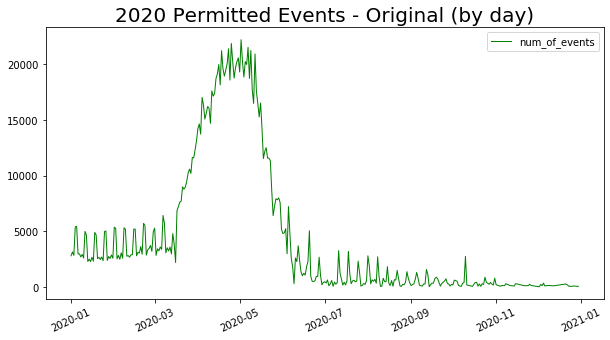

In [34]:
planned_pd = planned.toPandas()
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.plot('date','num_of_events', data=planned_pd, marker='', color='green', linewidth=1)
plt.title('2020 Permitted Events - Original (by day)',fontsize = 20)
plt.xticks( rotation=25 )
plt.rcParams['figure.figsize'] = (10,5)
plt.legend(prop={"size":10})

### 2020 Updated/Actual Events
#### NYC Open Data: Permitted Event Information-Updated

In [12]:
updated_event = "https://data.cityofnewyork.us/resource/tvpp-9vvx.csv?$select=event_id,event_name,start_date_time,end_date_time,event_type,event_borough&$where=start_date_time>'2020-01-01T00:00:00.000'&$limit=5000000"
updated = pd.read_csv(updated_event)
updated.count()

event_id           19493
event_name         19493
start_date_time    19493
end_date_time      19493
event_type         19493
event_borough      19493
dtype: int64

In [13]:
updated.head(10)

,event_id,event_name,start_date_time,end_date_time,event_type,event_borough
0,514769,Celebration,2020-10-24T16:00:00.000,2020-10-24T18:00:00.000,Special Event,Manhattan
1,514789,Music Entertainment,2020-07-19T15:00:00.000,2020-07-19T19:00:00.000,Special Event,Brooklyn
2,514792,House and Soulful Music on the boardwalk,2020-07-25T15:00:00.000,2020-07-25T19:00:00.000,Special Event,Brooklyn
3,514826,Celebration,2020-07-18T15:00:00.000,2020-07-18T19:00:00.000,Special Event,Brooklyn
4,514832,Miscellaneous,2020-05-12T09:00:00.000,2020-05-12T14:00:00.000,Special Event,Brooklyn
5,514835,SANKOFA SOUL,2020-09-05T15:00:00.000,2020-09-05T19:00:00.000,Special Event,Brooklyn
6,514842,SANKOFA SOUL,2020-08-16T15:00:00.000,2020-08-16T19:00:00.000,Special Event,Brooklyn
7,514857,Celebration,2020-09-28T14:00:00.000,2020-09-28T16:00:00.000,Special Event,Manhattan
8,514873,Celebration,2020-08-03T14:30:00.000,2020-08-03T16:00:00.000,Special Event,Manhattan
9,514877,DJ JOE GONZALEZ,2020-07-26T15:00:00.000,2020-07-26T19:00:00.000,Special Event,Brooklyn


In [14]:
updateddf = pandas_to_spark(updated)
updateddf = updateddf.withColumn("updated_date", to_timestamp("start_date_time", "yyyy-MM-dd'T'HH:mm:ss.SSS"))

In [15]:
updateddf.createOrReplaceTempView("updatedT")
updated = spark.sql("""
SELECT DATE(updated_date) AS date,
    COUNT(*) AS num_of_events
FROM updatedT
GROUP BY date
ORDER BY date
""")

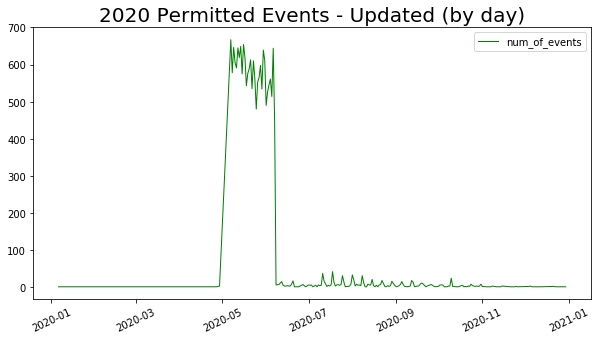

In [33]:
updated_pd = updated.toPandas()
plt.plot('date','num_of_events', data=updated_pd, marker='', color='green', linewidth=1)
plt.title('2020 Permitted Events - Updated (by day)',fontsize = 20)
plt.xticks( rotation=25 )
plt.rcParams['figure.figsize'] = (10,5)
plt.legend(prop={"size":10})

### Compare Original VS. Updated (by Month)

In [18]:
planned_bymonth = spark.sql("""
SELECT MONTH(planned_date) AS month,
    COUNT(*) AS original_event
FROM plannedT
GROUP BY month
ORDER BY month
""")
planned_bymonth = planned_bymonth.withColumn('monthname',
                                            f.when(f.col('month') == 1, "Jan")\
                                            .when(f.col('month') == 2, "Feb")\
                                            .when(f.col('month') == 3, "Mar")\
                                            .when(f.col('month') == 4, "Apr")\
                                            .when(f.col('month') == 5, "May")\
                                            .when(f.col('month') == 6, "Jun")\
                                            .when(f.col('month') == 7, "Jul")\
                                            .when(f.col('month') == 8, "Aug")\
                                            .when(f.col('month') == 9, "Sep")\
                                            .when(f.col('month') == 10, "Oct")\
                                            .when(f.col('month') == 11, "Nov")\
                                            .when(f.col('month') == 12, "Dec"))
updated_bymonth = spark.sql("""
SELECT MONTH(updated_date) AS month,
    COUNT(*) AS updated_event
FROM updatedT
GROUP BY month
ORDER BY month
""")

In [45]:
compare = planned_bymonth.join(updated_bymonth,["month"]).orderBy("month")
compare = compare.select("monthname","original_event","updated_event")
comparepd = compare.toPandas()
comparepd['drop_percent_rate'] = (1 - comparepd['updated_event']/comparepd['original_event'])*100
comparepd.head(20)

,monthname,original_event,updated_event,drop_percent_rate
0,Jan,101001,1,99.999010
1,Feb,107428,1,99.999069
2,Mar,206312,2,99.999031
3,Apr,541736,4,99.999262
4,May,446571,14856,96.673317
5,Jun,68370,3831,94.396665
6,Jul,21338,256,98.800262
7,Aug,22815,261,98.856016
8,Sep,12887,138,98.929153
9,Oct,10948,104,99.050055


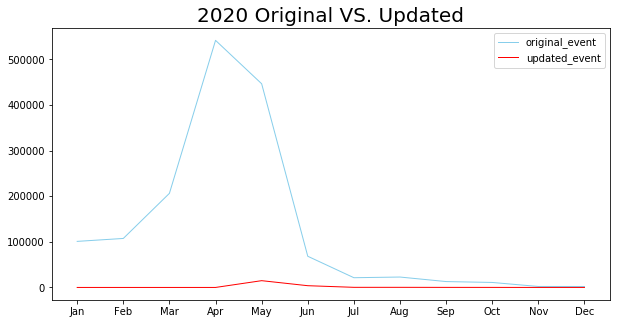

In [31]:
plt.plot('monthname','original_event', data=comparepd, marker='', color='skyblue', linewidth=1)
plt.plot('monthname','updated_event', data=comparepd, marker='', color='red', linewidth=1)
plt.title('2020 Original VS. Updated',fontsize = 20)
plt.rcParams['figure.figsize'] = (10,5)
plt.legend(prop={"size":10})